# 09 Periodic translation

A decision inherent to neighborhood operators is what to do with the pixels that are in the first and last rows and columns, as the neighborhood of these pixels goes beyond the image region. There are numerous solutions that address this. The two most common are:

1. Assume that the images are infinite and outside the image all pixels are zero.
2. Suppose that the image is repeated on the tiles of an infinite wall.

The first case is the most used when we perform filtering in the space domain (linear convolution). The second case is necessary when we want to perform filtering in the frequency domain, that is, using the Discrete Fourier Transform. In this case, the images are modeled as periodic and the associated translations are also all periodic.

There are three basic versions in which we can implement periodic translation:

## 1. Creating replicas

We can obtain periodic translation by replicating the image 4 times and extracting a window the same size as the original but translated image

In [1]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import numpy as np

(<matplotlib.image.AxesImage at 0x7f872bbb3fd0>,
 Text(0.5, 1.0, 'f periodically translated by (-30,-80)'))

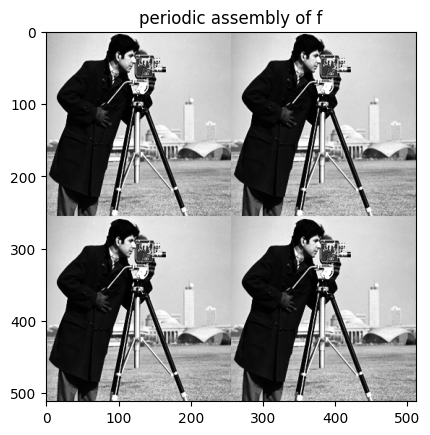

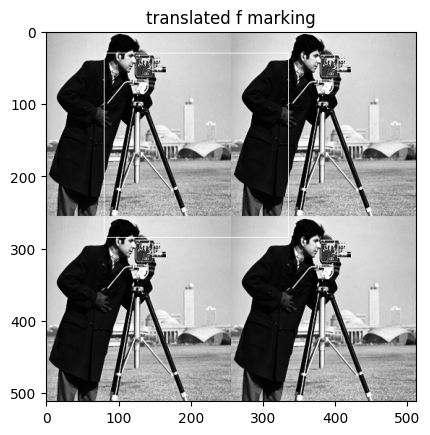

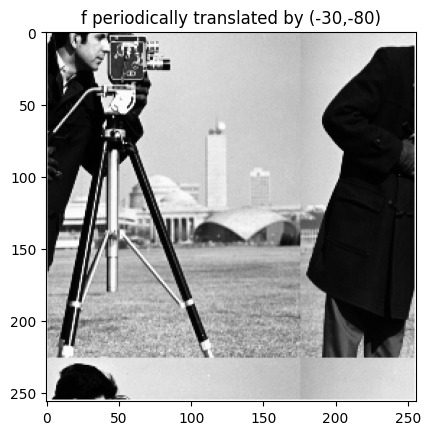

In [2]:
f = mpimg.imread('../figures/cameraman.tif')
plt.imshow(f,cmap='gray'),plt.title('original')
H,W = f.shape
dh,dw = (-30,-80)
dhi = (-dh + H) % H # inverse mapping same as done in iaffine (inverse of T)
dwi = (-dw + W) % W # inverse mapping
f2 = np.vstack((f,f))
f4 = np.hstack((f2,f2))
plt.figure(1)
plt.imshow(f4,cmap='gray'), plt.title('periodic assembly of f')
f4[dhi:dhi+H,dwi    ] = 255
f4[dhi:dhi+H,dwi+W-1] = 255
f4[dhi    ,dwi:dwi+W] = 255
f4[dhi+H-1,dwi:dwi+W] = 255
plt.figure(2)
plt.imshow(f4,cmap='gray'), plt.title('translated f marking')
g = f4[dhi:dhi+H,dwi:dwi+W]
plt.figure(3)
plt.imshow(g,cmap='gray'), plt.title('f periodically translated by (%d,%d)' % (dh,dw))

## 2. Using indexing

It is also possible to perform periodic translation using array indexing. The operation that allows periodicity in the calculation of indices is the **modulus**, implemented by the NumPy operator **%**.

In [3]:
def ptrans(f,t):
    import numpy as np
    g = np.empty_like(f) 
    if f.ndim == 1:
      W = f.shape[0]
      col = np.arange(W)
      g = f[(col-t)%W]
    elif f.ndim == 2:
      H,W = f.shape
      rr,cc = t
      row,col = np.indices(f.shape)
      g = f[(row-rr)%H, (col-cc)%W]
    elif f.ndim == 3:
      Z,H,W = f.shape
      zz,rr,cc = t
      z,row,col = np.indices(f.shape)
      g = f[(z-zz)%Z, (row-rr)%H, (col-cc)%W]
    return g

In [4]:
def ptrans2d(f,t):
    rr,cc = t
    H,W = f.shape
    
    r = rr%H
    c = cc%W
        
    g = np.empty_like(f)
    
    g[:r,:c] = f[H-r:H,W-c:W]
    g[:r,c:] = f[H-r:H,0:W-c]
    g[r:,:c] = f[0:H-r,W-c:W]
    g[r:,c:] = f[0:H-r,0:W-c]

    return g


Text(0.5, 1.0, 'Cameraman periodically translated')

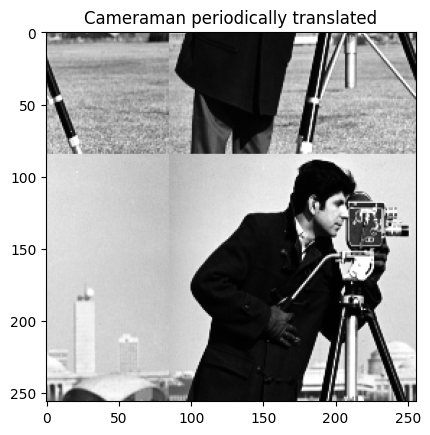

In [5]:
f = mpimg.imread('../figures/cameraman.tif')
f5=ptrans(f, np.array(f.shape)//3)
plt.imshow(f,cmap='gray')
plt.title('Original 2D image - Cameraman')
plt.imshow(f5,cmap='gray')
plt.title('Cameraman periodically translated')


## 3. Using slicing

There is a third way to implement it, which is to slice the image into 4 rectangular sub-regions and reposition them to generate the periodically translated image.